# Plan

1. Download image data from:
    https://github.com/mlmed/torchxrayvision

2. Preprocess the images to ensure they are in a consistent format (e.g., resizing, normalization).

3. Run our own basic tensorflow CNN model on the preprocessed images to establish a baseline performance.

4. compare against pretrained models from: https://github.com/mlmed/torchxrayvision

5. create a powerpoint presentation summarizing the findings, including:
    - Methodology
    - Results
    - Comparisons
    - Conclusions




In [3]:
##import modules

import os
import numpy as np
import pandas as pd
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"
#os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import itertools


In [4]:
# download images 
# torrent from https://academictorrents.com/details/e615d3aebce373f1dc8bd9d11064da55bdadede0
# use deluge to torrent: https://ftp.osuosl.org/pub/deluge/windows/?C=M;O=D

##file paths
## change to your local paths

image_db = "C:/Users/arafa/Desktop/Radeology_project/NIH/images-224/images-224"
labels_csv = "C:/Users/arafa/Desktop/Radeology_project/NIH/Data_Entry_2017.csv"

# also bring in labels for images from C:\Users\arafa\OneDrive\Desktop\Radiology_project\image_db\Data_Entry_2017.csv

labels = pd.read_csv(labels_csv)


In [3]:
import torch
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("Device name:", torch.cuda.get_device_name(0))


Torch version: 2.10.0.dev20251103+cu130
CUDA available: True
CUDA device count: 1
Device name: NVIDIA GeForce RTX 5080


labels columns: ['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID', 'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width', 'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11']
Detected label classes: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']
Train samples: 89696  Test samples: 22424


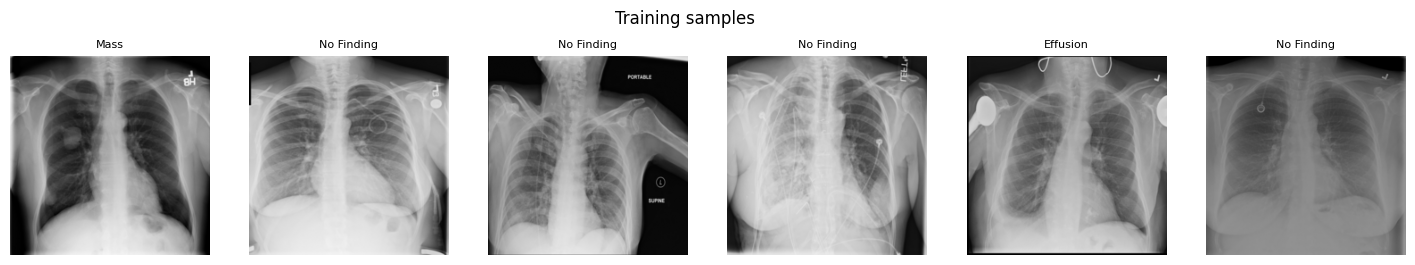

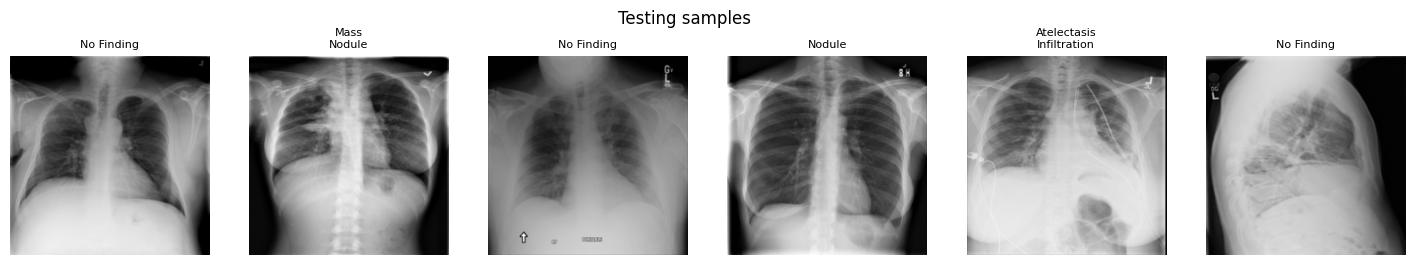

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,381,362 (16.71 MB)

 Trainable params: 331,791 (1.27 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/6
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 1014s 360ms/step - auc: 0.8227 - loss: 0.2216 - val_auc: 0.8296 - val_loss: 0.2178
Epoch 2/6
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 1016s 362ms/step - auc: 0.8259 - loss: 0.2195 - val_auc: 0.8287 - val_loss: 0.2178
Epoch 3/6
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 1013s 362ms/step - auc: 0.8265 - loss: 0.2194 - val_auc: 0.8316 - val_loss: 0.2173
Epoch 4/6
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 1026s 366ms/step - auc: 0.8269 - loss: 0.2192 - val_auc: 0.8309 - val_loss: 0.2184
Epoch 5/6
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 1024s 365ms/step - auc: 0.8269 - loss: 0.2192 - val_auc: 0.8300 - val_loss: 0.2209
Epoch 6/6
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 1013s 361ms/step - auc: 0.8273 - loss: 0.2190 - val_auc: 0.8317 - val_loss: 0.2174
Epoch 1/5
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 1206s 429ms/step - auc: 0.8198 - loss: 0.2231 - val_auc: 0.8326 - val_loss: 0.2198
Epoch 2/5
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 1189s 424ms/step - auc: 0.8283 - loss: 0.2185 - val_auc: 0.8328 - val_loss: 0.2191
Epoch 3/


Per-label evaluation:
                 label  precision  recall        f1       auc
10          No Finding   0.538798     1.0  0.700284  0.610432
1         Cardiomegaly   0.000000     0.0  0.000000  0.648486
0          Atelectasis   0.000000     0.0  0.000000  0.605268
3                Edema   0.000000     0.0  0.000000  0.708997
4             Effusion   0.000000     0.0  0.000000  0.684236
5            Emphysema   0.000000     0.0  0.000000  0.526547
2        Consolidation   0.000000     0.0  0.000000  0.683059
6             Fibrosis   0.000000     0.0  0.000000  0.439298
7               Hernia   0.000000     0.0  0.000000  0.514598
8         Infiltration   0.000000     0.0  0.000000  0.612780
9                 Mass   0.000000     0.0  0.000000  0.512110
11              Nodule   0.000000     0.0  0.000000  0.472190
12  Pleural_Thickening   0.000000     0.0  0.000000  0.539874
13           Pneumonia   0.000000     0.0  0.000000  0.651793
14        Pneumothorax   0.000000     0.0  0.00

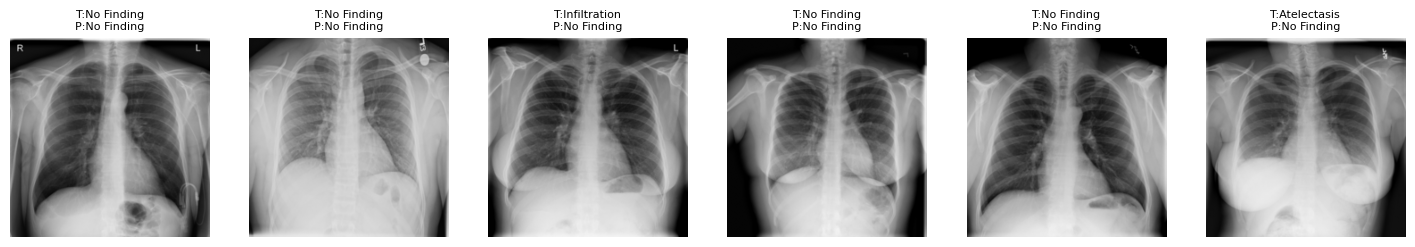

In [6]:
## do the following:

##build a model using tensorflow and keras to identify whether images in filepath image_db have a specific disease or are healthy

##the image files are labeled with ids

##the dataframe called 'labels' has a list of image ids in column Image Index and corresponding diseases in column 'Finding Labels'. If an image is health, under the column 'Finding Labels', it will be labeled 'No Finding'. There are multiple diseases that are under the column 'Finding Labels'.

##create a training and testing set that includes images with diseases and health chests

##visualize a sample of the images in both training and testing set

##build a CNN model using tensorflow and keras to identify diseases using the training set

##test the model on the testing set and report summary statistics on successes








# -----------------------------
# 1) Settings - change if needed
# -----------------------------
IMAGE_DIR = image_db   # folder that contains images
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE
EPOCHS = 6  # change as required; higher for better results
SEED = 42

# -----------------------------
# 2) Prepare the labels DataFrame
# -----------------------------
# The user said dataframe 'labels' already exists. If not, uncomment and modify to load CSV:
# labels = pd.read_csv("labels.csv")  # ensure columns 'Image Index' and 'Finding Labels'

# Preview
print("labels columns:", labels.columns.tolist())
assert 'Image Index' in labels.columns and 'Finding Labels' in labels.columns, \
       "labels must contain 'Image Index' and 'Finding Labels' columns"

# Normalize filename paths
labels = labels.copy()
labels['filepath'] = labels['Image Index'].apply(lambda fn: os.path.join(IMAGE_DIR, fn))

# Convert 'Finding Labels' into list of labels (multi-label)
def split_labels(s):
    if pd.isna(s):
        return []
    return [lab.strip() for lab in s.split('|') if lab.strip()]

labels['label_list'] = labels['Finding Labels'].apply(split_labels)

# Optional: if some files do not exist, drop them and warn
labels['exists'] = labels['filepath'].apply(os.path.exists)
missing = labels[~labels['exists']]
if len(missing) > 0:
    print(f"Warning: {len(missing)} files referenced in labels not found in {IMAGE_DIR}. They will be dropped.")
    labels = labels[labels['exists']].reset_index(drop=True)

# -----------------------------
# 3) MultiLabel binarizer (multi-hot encoding)
# -----------------------------
mlb = MultiLabelBinarizer(sparse_output=False)
Y = mlb.fit_transform(labels['label_list'])
label_classes = mlb.classes_.tolist()
print("Detected label classes:", label_classes)

# If 'No Finding' exists, it's treated as one of the labels.
# For strictly exclusive 'No Finding' vs others you may want to drop 'No Finding' from multi-hot encoding and treat as binary,
# but keeping it as one of the output labels allows detection of healthy chest along with other labels.

# -----------------------------
# 4) Train-test split
# -----------------------------
# For stability, we stratify by presence of 'No Finding' vs any disease so both sets contain healthy/diseased examples.
has_no_finding = labels['Finding Labels'].str.contains('No Finding', na=False)
stratify_col = has_no_finding.astype(int)  # 1 if healthy, 0 otherwise

train_df, test_df, y_train, y_test = train_test_split(
    labels, Y, test_size=0.2, random_state=SEED, stratify=stratify_col
)

print("Train samples:", len(train_df), " Test samples:", len(test_df))

# -----------------------------
# 5) Visualize some samples from train and test
# -----------------------------
import matplotlib.pyplot as plt
def show_samples(df, n=6, title="Samples"):
    sample = df.sample(n=min(n, len(df)), random_state=SEED)
    fig, axes = plt.subplots(1, len(sample), figsize=(len(sample)*3, 3))
    for ax, (_, row) in zip(axes, sample.iterrows()):
        try:
            img = plt.imread(row['filepath'])
        except Exception as e:
            ax.text(0.5, 0.5, "Unable to load", ha='center')
            ax.set_axis_off()
            continue
        ax.imshow(img if img.ndim==3 else plt.cm.gray(img))
        ax.set_title("\n".join(row['label_list'][:2]) if row['label_list'] else "None", fontsize=8)
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

show_samples(train_df, n=6, title="Training samples")
show_samples(test_df, n=6, title="Testing samples")

# -----------------------------
# 6) Build tf.data pipeline
# -----------------------------
def preprocess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_image(image, channels=3, expand_animations=False)
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

def make_dataset(filepaths, labels_array, is_train=True):
    ds = tf.data.Dataset.from_tensor_slices((filepaths, labels_array))
    if is_train:
        ds = ds.shuffle(buffer_size=len(filepaths), seed=SEED)
    ds = ds.map(preprocess_image, num_parallel_calls=AUTOTUNE)
    if is_train:
        ds = ds.map(lambda x,y: (tf.image.random_flip_left_right(x), y), num_parallel_calls=AUTOTUNE)
    ds = ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    return ds

train_ds = make_dataset(train_df['filepath'].values, y_train, is_train=True)
test_ds = make_dataset(test_df['filepath'].values, y_test, is_train=False)

# -----------------------------
# 7) Build the model (transfer learning with EfficientNetB0)
# -----------------------------
num_labels = Y.shape[1]
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # freeze base initially

inputs = keras.Input(shape=IMG_SIZE + (3,))
x = tf.keras.applications.efficientnet.preprocess_input(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
# multi-label: sigmoid outputs, one per label
outputs = layers.Dense(num_labels, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=[keras.metrics.AUC(name='auc')]
)

model.summary()

# -----------------------------
# 8) Train (phase 1)
# -----------------------------
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
]
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

# Optional: Fine-tune (unfreeze some base layers) for better performance
base_model.trainable = True
# Unfreeze last N layers (example)
fine_tune_at = len(base_model.layers) - 30
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=[keras.metrics.AUC(name='auc')]
)

fine_history = model.fit(train_ds, validation_data=test_ds, epochs=5, callbacks=callbacks)

# -----------------------------
# 9) Evaluate & predictions
# -----------------------------
# Predict probabilities on the test set
y_prob = model.predict(test_ds, verbose=1)  # shape (n_samples, num_labels)

# Convert dataset test_ds back into arrays of filepaths to align ordering:
# Easiest approach: build dataset of filepaths only for prediction ordering
test_filepaths = test_df['filepath'].values
# Already used predict on test_ds which follows order of test_df because we created from arrays in that order.

# Choose threshold(s) for converting probs -> predicted labels
threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)

# Compute per-label metrics
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None, zero_division=0)
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(y_test, y_pred, average='micro', zero_division=0)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred, average='macro', zero_division=0)

# Compute ROC AUC per label (if label has positive samples)
auc_per_label = []
for i in range(num_labels):
    try:
        auc_val = roc_auc_score(y_test[:, i], y_prob[:, i])
    except Exception:
        auc_val = np.nan
    auc_per_label.append(auc_val)

# Summarize
metrics_df = pd.DataFrame({
    'label': label_classes,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'auc': auc_per_label
})
print("\nPer-label evaluation:")
print(metrics_df.sort_values('f1', ascending=False))

print("\nAggregate metrics (threshold=%.2f):" % threshold)
print("micro  precision/recall/f1:", precision_micro, recall_micro, f1_micro)
print("macro  precision/recall/f1:", precision_macro, recall_macro, f1_macro)

# -----------------------------
# 10) Confusion-like summary for 'No Finding' (binary)
# -----------------------------
if 'No Finding' in label_classes:
    idx = label_classes.index('No Finding')
    y_true_nf = y_test[:, idx]
    y_pred_nf = y_pred[:, idx]
    tp = np.sum((y_true_nf==1) & (y_pred_nf==1))
    tn = np.sum((y_true_nf==0) & (y_pred_nf==0))
    fp = np.sum((y_true_nf==0) & (y_pred_nf==1))
    fn = np.sum((y_true_nf==1) & (y_pred_nf==0))
    print(f"\nConfusion for 'No Finding' (threshold {threshold}): TP={tp} TN={tn} FP={fp} FN={fn}")

# -----------------------------
# 11) Save model (optional)
# -----------------------------
model.save("disease_multilabel_model.h5")
print("Model saved to disease_multilabel_model.h5")

# -----------------------------
# 12) Show some predictions with images
# -----------------------------
def show_predictions(n=6):
    idxs = np.random.choice(len(test_df), size=min(n, len(test_df)), replace=False)
    fig, axes = plt.subplots(1, len(idxs), figsize=(len(idxs)*3, 3))
    for ax, i in zip(axes, idxs):
        row = test_df.iloc[i]
        img = plt.imread(row['filepath'])
        ax.imshow(img if img.ndim==3 else plt.cm.gray(img))
        true_labels = test_df.iloc[i]['label_list']
        pred_labels = [label_classes[j] for j,p in enumerate(y_pred[i]) if p==1]
        ax.set_title(f"T:{','.join(true_labels[:2])}\nP:{','.join(pred_labels[:2])}", fontsize=8)
        ax.axis('off')
    plt.show()

show_predictions(6)

Below uses pytorch to build a CNN model for image classification on X-ray images. This runs very slowly and as such, we will switch to tensorflow for better performance.

Using device: cuda
GPU: NVIDIA GeForce RTX 5080

=== Loading and Preparing Data ===
Total images: 112120

Class distribution:
binary_label
0    60412
1    51708
Name: count, dtype: int64
Healthy: 60412
Disease: 51708

Training set size: 89696
Testing set size: 22424
Training - Healthy: 48330, Disease: 41366
Testing - Healthy: 12082, Disease: 10342

=== Visualizing Sample Images ===


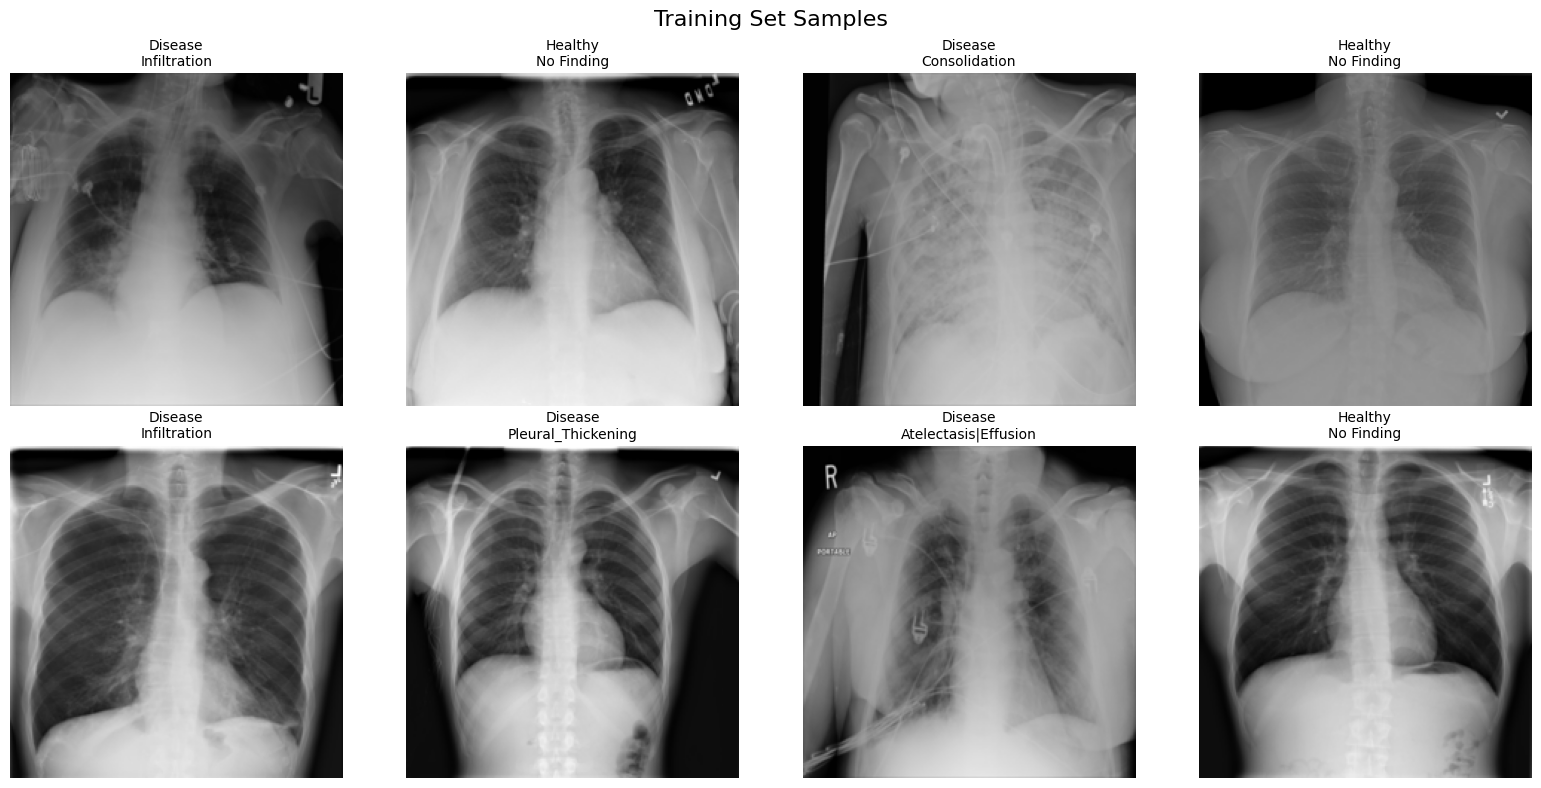

Saved visualization to 'sample_images.png'


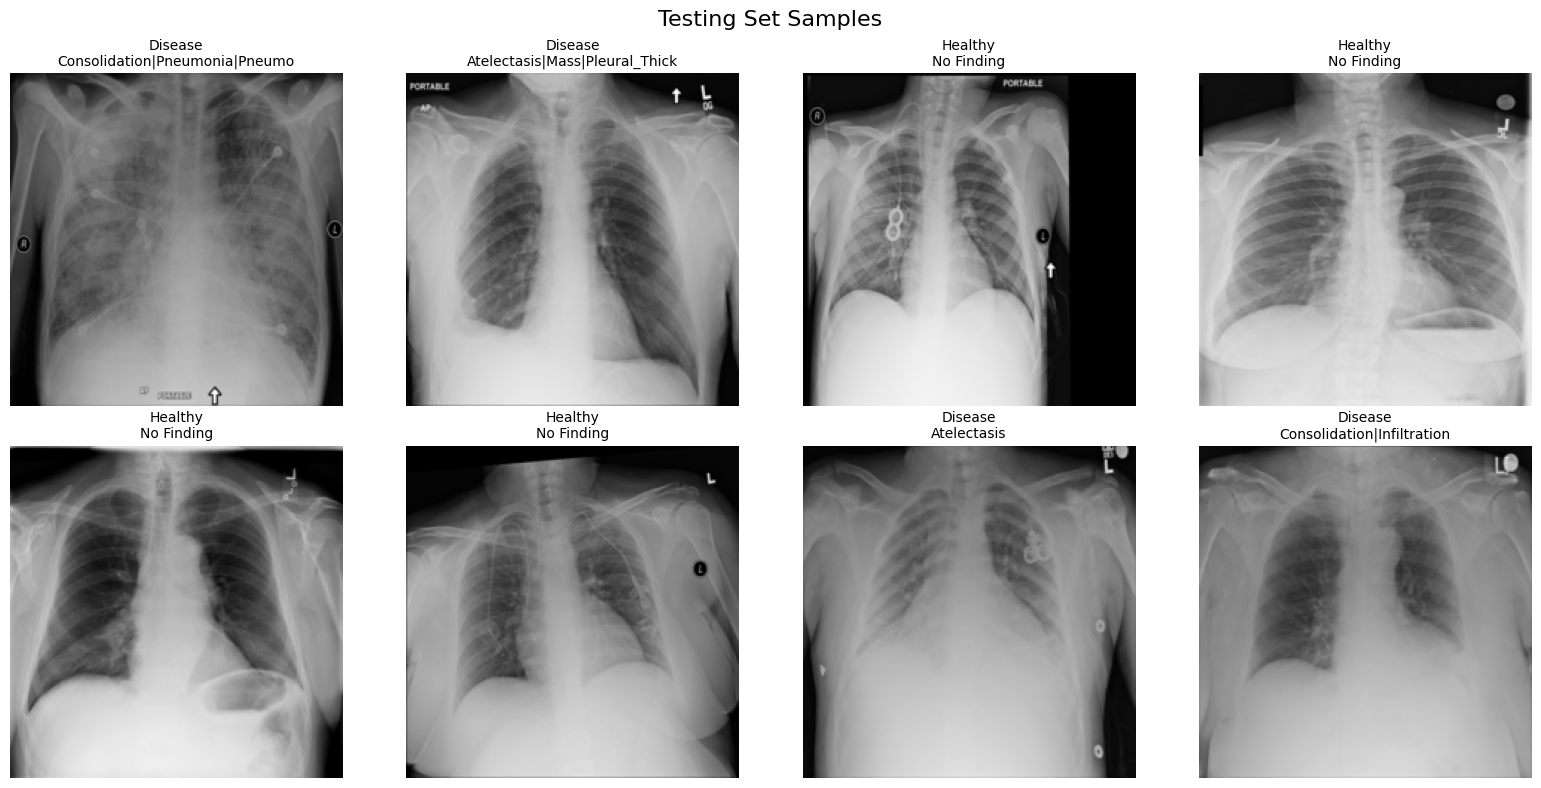

Saved visualization to 'sample_images.png'

=== Building Model ===


c:\Users\arafa\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\arafa\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model loaded on cuda

=== Training Model ===

Epoch 1/10
--------------------------------------------------


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

# ==================== Configuration ====================
image_db = image_db  # UPDATE THIS PATH
labels_path = labels_csv  # UPDATE THIS PATH
batch_size = 32
num_epochs = 10
learning_rate = 0.001
image_size = 224
test_size = 0.2
random_state = 42

# ==================== Custom Dataset ====================
class ChestXrayDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.dataframe = dataframe
        self.img_dir = img_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx]['Image Index']
        img_path = os.path.join(self.img_dir, img_name)
        
        # Load image
        image = Image.open(img_path).convert('RGB')
        
        # Get label (0 = healthy, 1 = disease)
        label = self.dataframe.iloc[idx]['binary_label']
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

# ==================== Data Preparation ====================
print("\n=== Loading and Preparing Data ===")

# Load labels
labels = pd.read_csv(labels_path)
print(f"Total images: {len(labels)}")

# Create binary labels: 0 = No Finding (healthy), 1 = Disease
labels['binary_label'] = (labels['Finding Labels'] != 'No Finding').astype(int)

# Check class distribution
print("\nClass distribution:")
print(labels['binary_label'].value_counts())
print(f"Healthy: {(labels['binary_label'] == 0).sum()}")
print(f"Disease: {(labels['binary_label'] == 1).sum()}")

# Split into train and test sets
train_df, test_df = train_test_split(
    labels, 
    test_size=test_size, 
    random_state=random_state,
    stratify=labels['binary_label']
)

print(f"\nTraining set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")
print(f"Training - Healthy: {(train_df['binary_label'] == 0).sum()}, Disease: {(train_df['binary_label'] == 1).sum()}")
print(f"Testing - Healthy: {(test_df['binary_label'] == 0).sum()}, Disease: {(test_df['binary_label'] == 1).sum()}")

# ==================== Data Transforms ====================
train_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ==================== Create Datasets and DataLoaders ====================
train_dataset = ChestXrayDataset(train_df.reset_index(drop=True), image_db, transform=train_transform)
test_dataset = ChestXrayDataset(test_df.reset_index(drop=True), image_db, transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# ==================== Visualization ====================
print("\n=== Visualizing Sample Images ===")

def visualize_samples(dataset, dataframe, title, num_samples=8):
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    fig.suptitle(title, fontsize=16)
    
    indices = np.random.choice(len(dataset), num_samples, replace=False)
    
    for idx, ax in zip(indices, axes.flat):
        img_name = dataframe.iloc[idx]['Image Index']
        img_path = os.path.join(image_db, img_name)
        img = Image.open(img_path).convert('RGB')
        
        label = dataframe.iloc[idx]['binary_label']
        finding = dataframe.iloc[idx]['Finding Labels']
        
        ax.imshow(img, cmap='gray')
        ax.set_title(f"{'Healthy' if label == 0 else 'Disease'}\n{finding[:30]}", fontsize=10)
        ax.axis('off')
    
    plt.tight_layout()
    plt.savefig('sample_images.png', dpi=150, bbox_inches='tight')
    plt.show()
    print(f"Saved visualization to 'sample_images.png'")

# Visualize training samples
visualize_samples(train_dataset, train_df.reset_index(drop=True), "Training Set Samples")

# Visualize testing samples
visualize_samples(test_dataset, test_df.reset_index(drop=True), "Testing Set Samples")

# ==================== Model Definition ====================
print("\n=== Building Model ===")

class ChestXrayClassifier(nn.Module):
    def __init__(self, num_classes=2):
        super(ChestXrayClassifier, self).__init__()
        # Load pretrained ResNet50
        self.model = models.resnet50(pretrained=True)
        
        # Freeze early layers
        for param in list(self.model.parameters())[:-20]:
            param.requires_grad = False
        
        # Replace final layer
        num_features = self.model.fc.in_features
        self.model.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(num_features, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )
    
    def forward(self, x):
        return self.model(x)

model = ChestXrayClassifier(num_classes=2).to(device)
print(f"Model loaded on {device}")

# ==================== Training Setup ====================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5)

# ==================== Training Function ====================
def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(dataloader)
    epoch_acc = 100 * correct / total
    return epoch_loss, epoch_acc

# ==================== Evaluation Function ====================
def evaluate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    all_probs = []
    
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            # Get probabilities for ROC-AUC
            probs = torch.softmax(outputs, dim=1)
            all_probs.extend(probs[:, 1].cpu().numpy())
    
    epoch_loss = running_loss / len(dataloader)
    epoch_acc = 100 * correct / total
    return epoch_loss, epoch_acc, all_preds, all_labels, all_probs

# ==================== Training Loop ====================
print("\n=== Training Model ===")

train_losses = []
train_accs = []
val_losses = []
val_accs = []

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print("-" * 50)
    
    # Train
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    # Evaluate on test set
    val_loss, val_acc, _, _, _ = evaluate(model, test_loader, criterion, device)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")
    
    # Learning rate scheduling
    scheduler.step(val_loss)

# Save model
torch.save(model.state_dict(), 'chest_xray_model.pth')
print("\nModel saved to 'chest_xray_model.pth'")

# ==================== Final Evaluation ====================
print("\n=== Final Evaluation on Test Set ===")

test_loss, test_acc, predictions, true_labels, probabilities = evaluate(
    model, test_loader, criterion, device
)

print(f"\nTest Accuracy: {test_acc:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# ==================== Performance Metrics ====================
print("\n=== Classification Report ===")
print(classification_report(
    true_labels, 
    predictions, 
    target_names=['Healthy', 'Disease'],
    digits=4
))

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
print("\n=== Confusion Matrix ===")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy', 'Disease'],
            yticklabels=['Healthy', 'Disease'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved confusion matrix to 'confusion_matrix.png'")

# ROC-AUC Score
roc_auc = roc_auc_score(true_labels, probabilities)
print(f"\n=== ROC-AUC Score ===")
print(f"ROC-AUC: {roc_auc:.4f}")

# ==================== Training History Plots ====================
print("\n=== Plotting Training History ===")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Loss plot
ax1.plot(train_losses, label='Train Loss', marker='o')
ax1.plot(val_losses, label='Validation Loss', marker='s')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()
ax1.grid(True)

# Accuracy plot
ax2.plot(train_accs, label='Train Accuracy', marker='o')
ax2.plot(val_accs, label='Validation Accuracy', marker='s')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.savefig('training_history.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved training history to 'training_history.png'")

# ==================== Summary Statistics ====================
print("\n" + "="*60)
print("                    SUMMARY STATISTICS")
print("="*60)
print(f"Dataset Size: {len(labels)} images")
print(f"Training Set: {len(train_df)} images")
print(f"Testing Set: {len(test_df)} images")
print(f"\nModel: ResNet50 (pretrained)")
print(f"Device: {device}")
print(f"Epochs: {num_epochs}")
print(f"Batch Size: {batch_size}")
print(f"\nFinal Test Accuracy: {test_acc:.2f}%")
print(f"Final Test Loss: {test_loss:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"\nTrue Negatives (Healthy correctly identified): {cm[0][0]}")
print(f"False Positives (Healthy incorrectly identified as Disease): {cm[0][1]}")
print(f"False Negatives (Disease incorrectly identified as Healthy): {cm[1][0]}")
print(f"True Positives (Disease correctly identified): {cm[1][1]}")
print("="*60)

Using Tensorflow to build a image recognition model for X-ray images, binary classification only (e.g., disease vs no disease). Keeping classification simple for faster training times and better accuracy.

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import os
import gc

# Configuration - REDUCED for memory efficiency
IMAGE_SIZE = (128, 128)  # Reduced from 224x224
BATCH_SIZE = 16  # Reduced from 32
EPOCHS = 7  # Reduced from 20
LEARNING_RATE = 0.001
MAX_SAMPLES_PER_CLASS = 5000  # Limit dataset size if needed

# Enable memory growth for GPU (if available)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Step 1: Data Preparation
def prepare_data(labels, image_db, sample_limit=None):
    """
    Prepare training and testing datasets with memory-efficient sampling
    """
    # Create binary label: string format for flow_from_dataframe
    labels['binary_label'] = labels['Finding Labels'].apply(
        lambda x: 'healthy' if x == 'No Finding' else 'disease'
    )
    
    # Create full image paths
    labels['image_path'] = labels['Image Index'].apply(
        lambda x: os.path.join(image_db, x)
    )
    
    # Filter out images that don't exist
    print("Checking image paths...")
    labels = labels[labels['image_path'].apply(os.path.exists)].reset_index(drop=True)
    
    # Balance and limit dataset size if needed
    if sample_limit:
        healthy = labels[labels['binary_label'] == 'healthy'].sample(
            n=min(sample_limit, len(labels[labels['binary_label'] == 'healthy'])),
            random_state=42
        )
        disease = labels[labels['binary_label'] == 'disease'].sample(
            n=min(sample_limit, len(labels[labels['binary_label'] == 'disease'])),
            random_state=42
        )
        labels = pd.concat([healthy, disease]).reset_index(drop=True)
    
    print(f"Total images found: {len(labels)}")
    print(f"Healthy images: {(labels['binary_label'] == 'healthy').sum()}")
    print(f"Disease images: {(labels['binary_label'] == 'disease').sum()}")
    
    # Split into train and test sets (80-20 split)
    train_df, test_df = train_test_split(
        labels, 
        test_size=0.2, 
        stratify=labels['binary_label'],
        random_state=42
    )
    
    print(f"\nTraining set: {len(train_df)} images")
    print(f"Testing set: {len(test_df)} images")
    
    return train_df, test_df

# Step 2: Visualization
def visualize_samples(train_df, test_df, n_samples=8):
    """
    Visualize sample images from training and testing sets
    """
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    fig.suptitle('Sample X-ray Images', fontsize=14, y=0.995)
    
    # Training samples (first 2 rows)
    for i in range(8):
        row = i // 4
        col = i % 4
        idx = np.random.randint(0, len(train_df))
        img_path = train_df.iloc[idx]['image_path']
        label = train_df.iloc[idx]['binary_label'].capitalize()
        
        try:
            img = keras.preprocessing.image.load_img(img_path, target_size=IMAGE_SIZE)
            img_array = keras.preprocessing.image.img_to_array(img)
            
            axes[row, col].imshow(img_array.astype('uint8'), cmap='gray')
            axes[row, col].set_title(f'Train: {label}', fontsize=10)
            axes[row, col].axis('off')
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            axes[row, col].axis('off')
    
    # Testing samples (last 2 rows)
    for i in range(8):
        row = i // 4 + 2
        col = i % 4
        idx = np.random.randint(0, len(test_df))
        img_path = test_df.iloc[idx]['image_path']
        label = test_df.iloc[idx]['binary_label'].capitalize()
        
        try:
            img = keras.preprocessing.image.load_img(img_path, target_size=IMAGE_SIZE)
            img_array = keras.preprocessing.image.img_to_array(img)
            
            axes[row, col].imshow(img_array.astype('uint8'), cmap='gray')
            axes[row, col].set_title(f'Test: {label}', fontsize=10)
            axes[row, col].axis('off')
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.savefig('xray_samples.png', dpi=100, bbox_inches='tight')
    plt.show()
    print("Sample visualization saved as 'xray_samples.png'")
    
    # Clear memory
    plt.close('all')
    gc.collect()

# Step 3: Data Generators
def create_data_generators(train_df, test_df):
    """
    Create memory-efficient data generators
    """
    # Training data generator with light augmentation
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    # Testing data generator (only rescaling)
    test_datagen = ImageDataGenerator(rescale=1./255)
    
    train_generator = train_datagen.flow_from_dataframe(
        train_df,
        x_col='image_path',
        y_col='binary_label',
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        classes=['healthy', 'disease'],
        shuffle=True
    )
    
    test_generator = test_datagen.flow_from_dataframe(
        test_df,
        x_col='image_path',
        y_col='binary_label',
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        classes=['healthy', 'disease'],
        shuffle=False
    )
    
    return train_generator, test_generator

# Step 4: Build Lightweight Model
def build_model():
    """
    Build efficient CNN model for binary classification
    """
    model = keras.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=IMAGE_SIZE + (3,)),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),
        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),
        
        # Dense layers
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.AUC(name='auc')]
    )
    
    return model

# Step 5: Train Model
def train_model(model, train_generator, test_generator, epochs=EPOCHS):
    """
    Train the model with callbacks
    """
    callbacks = [
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True,
            verbose=1
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=3,
            min_lr=1e-7,
            verbose=1
        ),
        keras.callbacks.ModelCheckpoint(
            'best_model.h5',
            monitor='val_auc',
            mode='max',
            save_best_only=True,
            verbose=1
        )
    ]
    
    history = model.fit(
        train_generator,
        validation_data=test_generator,
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )
    # Clear memory
    gc.collect()
    
    return history

# Step 6: Evaluate Model
def evaluate_model(model, test_generator, test_df):
    """
    Evaluate model and generate performance statistics
    """
    print("\n" + "="*60)
    print("MODEL EVALUATION SUMMARY")
    print("="*60)
    
    # Get predictions in batches to save memory
    test_generator.reset()
    y_pred_proba = model.predict(
        test_generator, 
        verbose=1
    )
    y_pred = (y_pred_proba > 0.5).astype(int).flatten()
    y_true = (test_df['binary_label'] == 'disease').astype(int).values
    
    # Classification Report
    print("\nClassification Report:")
    print("-" * 60)
    target_names = ['Healthy', 'Disease']
    print(classification_report(y_true, y_pred, target_names=target_names))
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=target_names, yticklabels=target_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig('confusion_matrix.png', dpi=100, bbox_inches='tight')
    plt.show()
    plt.close()
    print("\nConfusion matrix saved as 'confusion_matrix.png'")
    
    # ROC Curve and AUC
    auc_score = roc_auc_score(y_true, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.savefig('roc_curve.png', dpi=100, bbox_inches='tight')
    plt.show()
    plt.close()
    print("ROC curve saved as 'roc_curve.png'")
    
    # Additional Statistics
    print("\n" + "-"*60)
    print("Additional Performance Metrics:")
    print("-"*60)
    print(f"AUC-ROC Score: {auc_score:.4f}")
    
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Positive Predictive Value (Precision): {ppv:.4f}")
    print(f"Negative Predictive Value: {npv:.4f}")
    print(f"\nTrue Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    print("="*60)
    
    # Clear memory
    gc.collect()
    
    return y_pred, y_pred_proba

# Step 7: Plot Training History
def plot_training_history(history):
    """
    Plot training and validation metrics
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # Accuracy
    axes[0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0].set_title('Model Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Loss
    axes[1].plot(history.history['loss'], label='Training Loss')
    axes[1].plot(history.history['val_loss'], label='Validation Loss')
    axes[1].set_title('Model Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(alpha=0.3)
    
    # AUC
    axes[2].plot(history.history['auc'], label='Training AUC')
    axes[2].plot(history.history['val_auc'], label='Validation AUC')
    axes[2].set_title('Model AUC')
    axes[2].set_xlabel('Epoch')
    axes[2].set_ylabel('AUC')
    axes[2].legend()
    axes[2].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('training_history.png', dpi=100, bbox_inches='tight')
    plt.show()
    plt.close()
    print("Training history saved as 'training_history.png'")
    
    # Clear memory
    gc.collect()

# Main execution function
def main(labels, image_db, sample_limit=MAX_SAMPLES_PER_CLASS):
    """
    Main pipeline for chest X-ray disease classification
    """
    print("Starting Chest X-ray Disease Classification Pipeline")
    print("="*60)
    
    # Step 1: Prepare data
    print("\nStep 1: Preparing data...")
    train_df, test_df = prepare_data(labels, image_db, sample_limit)
    
    # Step 2: Visualize samples
    print("\nStep 2: Visualizing sample images...")
    visualize_samples(train_df, test_df)
    
    # Step 3: Create data generators
    print("\nStep 3: Creating data generators...")
    train_generator, test_generator = create_data_generators(train_df, test_df)
    
    # Step 4: Build model
    print("\nStep 4: Building model...")
    model = build_model()
    print(model.summary())
    
    # Step 5: Train model
    print("\nStep 5: Training model...")
    history = train_model(model, train_generator, test_generator)
    
    # Step 6: Plot training history
    print("\nStep 6: Plotting training history...")
    plot_training_history(history)
    
    # Step 7: Evaluate model
    print("\nStep 7: Evaluating model...")
    evaluate_model(model, test_generator, test_df)
    
    # Save model
    model.save('chest_xray_disease_model.h5')
    print("\nModel saved as 'chest_xray_disease_model.h5'")
    
    # Final cleanup
    gc.collect()
    
    return model, train_df, test_df

# Run the pipeline
# Uncomment the following lines and provide your data:
# labels = pd.read_csv('your_labels.csv')
# image_db = '/path/to/your/images'
# 
# # For large datasets, limit samples per class (e.g., 5000)
# model, train_df, test_df = main(labels, image_db, sample_limit=5000)
#
# # For full dataset, set sample_limit=None
# # model, train_df, test_df = main(labels, image_db, sample_limit=None)

Starting Chest X-ray Disease Classification Pipeline

Step 1: Preparing data...
Checking image paths...
Total images found: 112120
Healthy images: 60412
Disease images: 51708

Training set: 89696 images
Testing set: 22424 images

Step 2: Visualizing sample images...


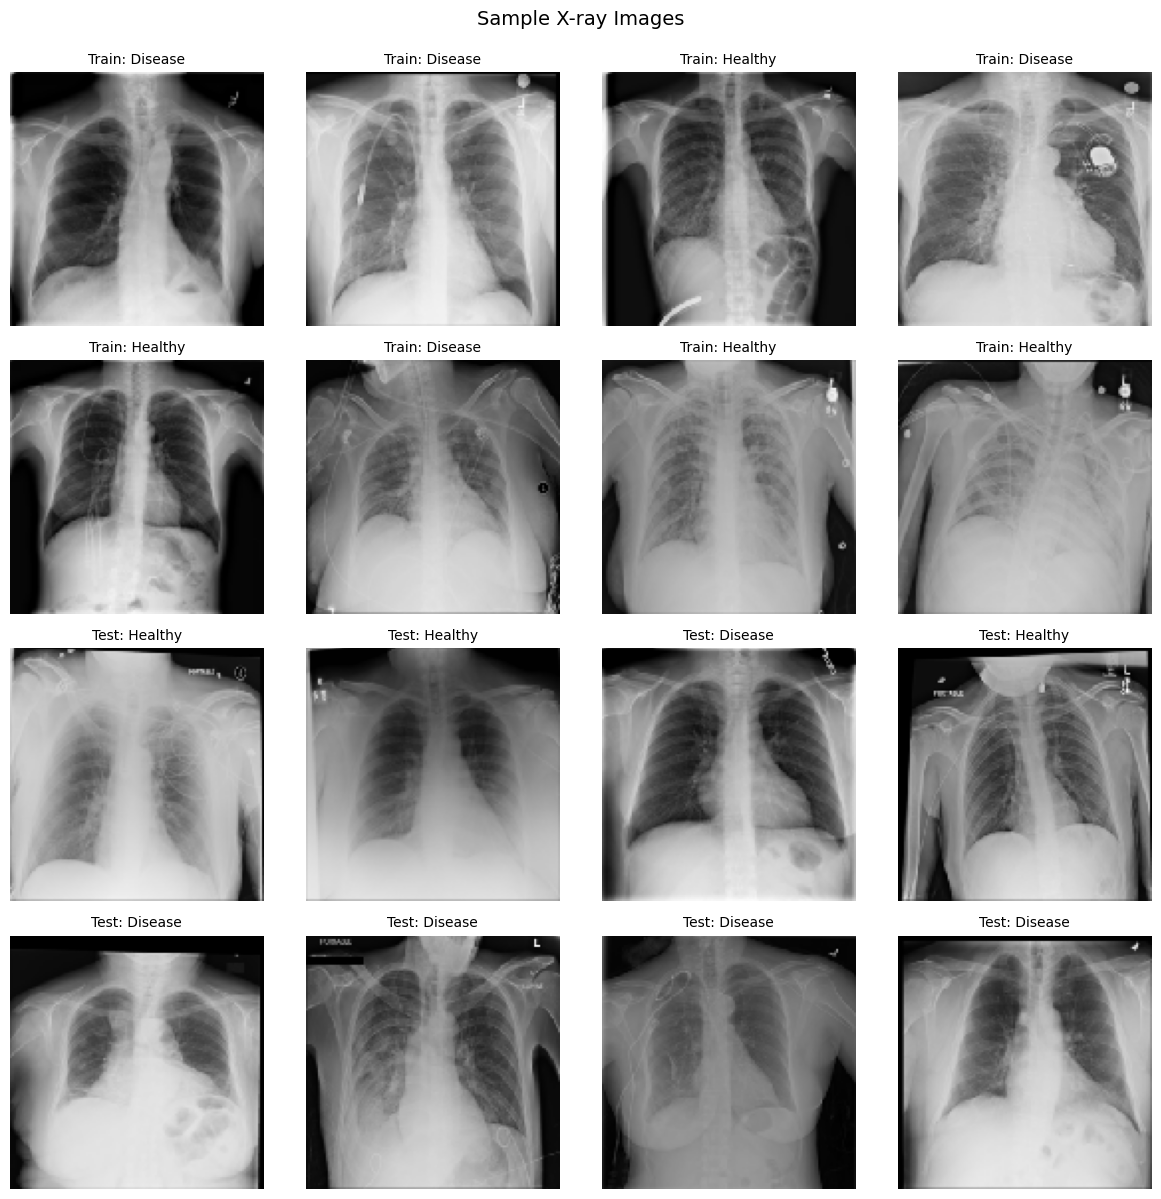

Sample visualization saved as 'xray_samples.png'

Step 3: Creating data generators...
Found 89696 validated image filenames belonging to 2 classes.
Found 22424 validated image filenames belonging to 2 classes.

Step 4: Building model...


c:\Users\arafa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,665 (12.61 MB)

 Trainable params: 3,305,217 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

None

Step 5: Training model...
Epoch 1/7
5605/5606 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5516 - auc: 0.5682 - loss: 0.7762
Epoch 1: val_auc improved from None to 0.61357, saving model to best_model.h5


5606/5606 ━━━━━━━━━━━━━━━━━━━━ 271s 48ms/step - accuracy: 0.5646 - auc: 0.5839 - loss: 0.7056 - val_accuracy: 0.5856 - val_auc: 0.6136 - val_loss: 0.6767 - learning_rate: 0.0010
Epoch 2/7
5606/5606 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5656 - auc: 0.5856 - loss: 0.6786
Epoch 2: val_auc improved from 0.61357 to 0.67000, saving model to best_model.h5


5606/5606 ━━━━━━━━━━━━━━━━━━━━ 288s 51ms/step - accuracy: 0.5704 - auc: 0.5933 - loss: 0.6776 - val_accuracy: 0.6293 - val_auc: 0.6700 - val_loss: 0.6591 - learning_rate: 0.0010
Epoch 3/7
5605/5606 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5872 - auc: 0.6079 - loss: 0.6750
Epoch 3: val_auc improved from 0.67000 to 0.67603, saving model to best_model.h5


5606/5606 ━━━━━━━━━━━━━━━━━━━━ 290s 52ms/step - accuracy: 0.5916 - auc: 0.6148 - loss: 0.6727 - val_accuracy: 0.6366 - val_auc: 0.6760 - val_loss: 0.6550 - learning_rate: 0.0010
Epoch 4/7
5606/5606 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6055 - auc: 0.6308 - loss: 0.6679
Epoch 4: val_auc improved from 0.67603 to 0.68681, saving model to best_model.h5


5606/5606 ━━━━━━━━━━━━━━━━━━━━ 279s 50ms/step - accuracy: 0.6108 - auc: 0.6402 - loss: 0.6642 - val_accuracy: 0.6390 - val_auc: 0.6868 - val_loss: 0.6551 - learning_rate: 0.0010
Epoch 5/7
5606/5606 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6217 - auc: 0.6515 - loss: 0.6588
Epoch 5: val_auc did not improve from 0.68681
5606/5606 ━━━━━━━━━━━━━━━━━━━━ 299s 53ms/step - accuracy: 0.6234 - auc: 0.6546 - loss: 0.6574 - val_accuracy: 0.5310 - val_auc: 0.6639 - val_loss: 0.6876 - learning_rate: 0.0010
Epoch 6/7
5606/5606 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6265 - auc: 0.6622 - loss: 0.6530
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 6: val_auc improved from 0.68681 to 0.69596, saving model to best_model.h5


5606/5606 ━━━━━━━━━━━━━━━━━━━━ 307s 55ms/step - accuracy: 0.6313 - auc: 0.6695 - loss: 0.6513 - val_accuracy: 0.6340 - val_auc: 0.6960 - val_loss: 0.6595 - learning_rate: 0.0010
Epoch 7/7
5605/5606 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6426 - auc: 0.6837 - loss: 0.6437
Epoch 7: val_auc improved from 0.69596 to 0.71823, saving model to best_model.h5


5606/5606 ━━━━━━━━━━━━━━━━━━━━ 302s 51ms/step - accuracy: 0.6460 - auc: 0.6893 - loss: 0.6411 - val_accuracy: 0.6729 - val_auc: 0.7182 - val_loss: 0.6214 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 7.

Step 6: Plotting training history...


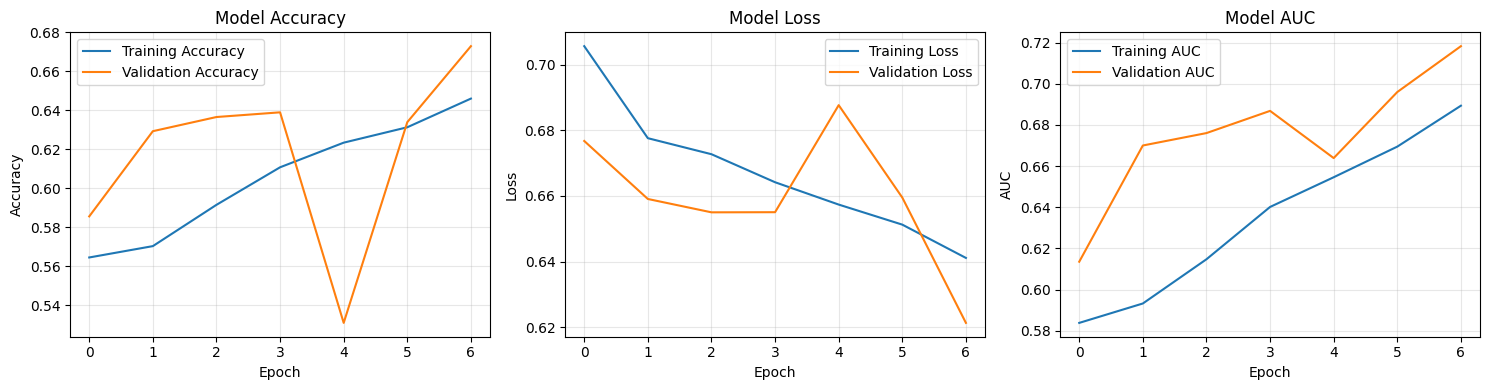

Training history saved as 'training_history.png'

Step 7: Evaluating model...

MODEL EVALUATION SUMMARY
1402/1402 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step

Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

     Healthy       0.68      0.75      0.71     12082
     Disease       0.67      0.58      0.62     10342

    accuracy                           0.67     22424
   macro avg       0.67      0.67      0.67     22424
weighted avg       0.67      0.67      0.67     22424



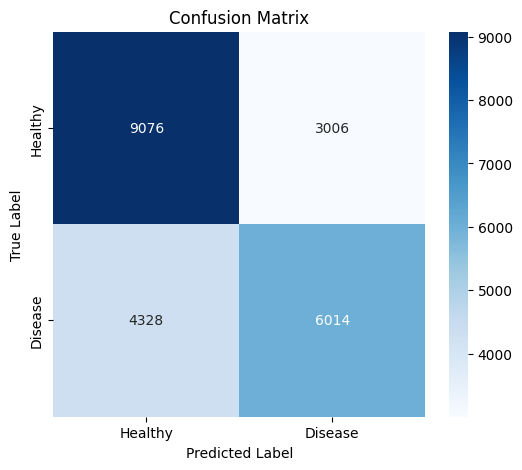


Confusion matrix saved as 'confusion_matrix.png'


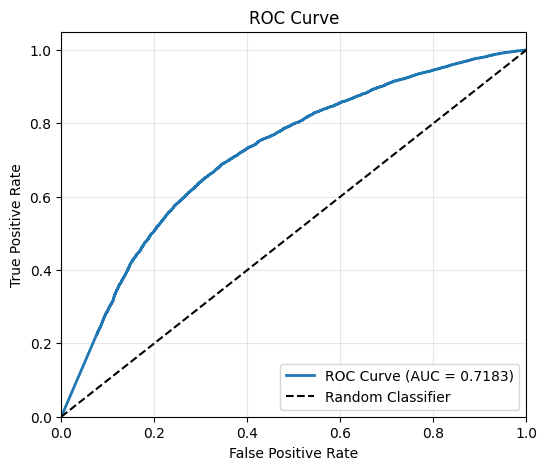

ROC curve saved as 'roc_curve.png'

------------------------------------------------------------
Additional Performance Metrics:
------------------------------------------------------------
AUC-ROC Score: 0.7183
Sensitivity (Recall): 0.5815
Specificity: 0.7512
Positive Predictive Value (Precision): 0.6667
Negative Predictive Value: 0.6771

True Negatives: 9076
False Positives: 3006
False Negatives: 4328
True Positives: 6014



Model saved as 'chest_xray_disease_model.h5'


In [4]:
model, train_df, test_df = main(labels, image_db, sample_limit=None)

Using similar code from above, create a UNET model instead

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import os
import gc

# Configuration - Memory efficient settings
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 16
EPOCHS = 8
LEARNING_RATE = 0.001
MAX_SAMPLES_PER_CLASS = 5000

# Enable memory growth for GPU (if available)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Step 1: Data Preparation
def prepare_data(labels, image_db, sample_limit=None):
    """
    Prepare training and testing datasets with memory-efficient sampling
    """
    # Create binary label: string format for flow_from_dataframe
    labels['binary_label'] = labels['Finding Labels'].apply(
        lambda x: 'healthy' if x == 'No Finding' else 'disease'
    )
    
    # Create full image paths
    labels['image_path'] = labels['Image Index'].apply(
        lambda x: os.path.join(image_db, x)
    )
    
    # Filter out images that don't exist
    print("Checking image paths...")
    labels = labels[labels['image_path'].apply(os.path.exists)].reset_index(drop=True)
    
    # Balance and limit dataset size if needed
    if sample_limit:
        healthy = labels[labels['binary_label'] == 'healthy'].sample(
            n=min(sample_limit, len(labels[labels['binary_label'] == 'healthy'])),
            random_state=42
        )
        disease = labels[labels['binary_label'] == 'disease'].sample(
            n=min(sample_limit, len(labels[labels['binary_label'] == 'disease'])),
            random_state=42
        )
        labels = pd.concat([healthy, disease]).reset_index(drop=True)
    
    print(f"Total images found: {len(labels)}")
    print(f"Healthy images: {(labels['binary_label'] == 'healthy').sum()}")
    print(f"Disease images: {(labels['binary_label'] == 'disease').sum()}")
    
    # Split into train and test sets (80-20 split)
    train_df, test_df = train_test_split(
        labels, 
        test_size=0.2, 
        stratify=labels['binary_label'],
        random_state=42
    )
    
    print(f"\nTraining set: {len(train_df)} images")
    print(f"Testing set: {len(test_df)} images")
    
    return train_df, test_df

# Step 2: Visualization
def visualize_samples(train_df, test_df, n_samples=8):
    """
    Visualize sample images from training and testing sets
    """
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    fig.suptitle('Sample X-ray Images', fontsize=14, y=0.995)
    
    # Training samples (first 2 rows)
    for i in range(8):
        row = i // 4
        col = i % 4
        idx = np.random.randint(0, len(train_df))
        img_path = train_df.iloc[idx]['image_path']
        label = train_df.iloc[idx]['binary_label'].capitalize()
        
        try:
            img = keras.preprocessing.image.load_img(img_path, target_size=IMAGE_SIZE)
            img_array = keras.preprocessing.image.img_to_array(img)
            
            axes[row, col].imshow(img_array.astype('uint8'), cmap='gray')
            axes[row, col].set_title(f'Train: {label}', fontsize=10)
            axes[row, col].axis('off')
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            axes[row, col].axis('off')
    
    # Testing samples (last 2 rows)
    for i in range(8):
        row = i // 4 + 2
        col = i % 4
        idx = np.random.randint(0, len(test_df))
        img_path = test_df.iloc[idx]['image_path']
        label = test_df.iloc[idx]['binary_label'].capitalize()
        
        try:
            img = keras.preprocessing.image.load_img(img_path, target_size=IMAGE_SIZE)
            img_array = keras.preprocessing.image.img_to_array(img)
            
            axes[row, col].imshow(img_array.astype('uint8'), cmap='gray')
            axes[row, col].set_title(f'Test: {label}', fontsize=10)
            axes[row, col].axis('off')
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.savefig('xray_samples_unet.png', dpi=100, bbox_inches='tight')
    plt.show()
    print("Sample visualization saved as 'xray_samples_unet.png'")
    
    # Clear memory
    plt.close('all')
    gc.collect()

# Step 3: Data Generators
def create_data_generators(train_df, test_df):
    """
    Create memory-efficient data generators
    """
    # Training data generator with light augmentation
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    # Testing data generator (only rescaling)
    test_datagen = ImageDataGenerator(rescale=1./255)
    
    train_generator = train_datagen.flow_from_dataframe(
        train_df,
        x_col='image_path',
        y_col='binary_label',
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        classes=['healthy', 'disease'],
        shuffle=True
    )
    
    test_generator = test_datagen.flow_from_dataframe(
        test_df,
        x_col='image_path',
        y_col='binary_label',
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        classes=['healthy', 'disease'],
        shuffle=False
    )
    
    return train_generator, test_generator

# Step 4: Build U-Net Model for Classification
def conv_block(inputs, filters, dropout=0.0):
    """
    Convolutional block for U-Net encoder/decoder
    """
    x = layers.Conv2D(filters, 3, activation='relu', padding='same', 
                     kernel_initializer='he_normal')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, 3, activation='relu', padding='same',
                     kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    if dropout > 0:
        x = layers.Dropout(dropout)(x)
    return x

def encoder_block(inputs, filters, dropout=0.0):
    """
    Encoder block: conv_block + max pooling
    """
    x = conv_block(inputs, filters, dropout)
    p = layers.MaxPooling2D((2, 2))(x)
    return x, p

def decoder_block(inputs, skip_features, filters, dropout=0.0):
    """
    Decoder block: upsampling + concatenation + conv_block
    """
    x = layers.Conv2DTranspose(filters, (2, 2), strides=2, padding='same')(inputs)
    x = layers.concatenate([x, skip_features])
    x = conv_block(x, filters, dropout)
    return x

def build_unet_classifier():
    """
    Build U-Net architecture adapted for classification
    U-Net is typically used for segmentation, but we adapt it for 
    binary classification by using the bottleneck features
    """
    inputs = layers.Input(shape=IMAGE_SIZE + (3,))
    
    # Encoder (Contracting Path)
    s1, p1 = encoder_block(inputs, 32, dropout=0.1)     # 128x128 -> 64x64
    s2, p2 = encoder_block(p1, 64, dropout=0.1)         # 64x64 -> 32x32
    s3, p3 = encoder_block(p2, 128, dropout=0.2)        # 32x32 -> 16x16
    s4, p4 = encoder_block(p3, 256, dropout=0.2)        # 16x16 -> 8x8
    
    # Bottleneck
    b = conv_block(p4, 512, dropout=0.3)                # 8x8
    
    # Decoder (Expanding Path)
    d1 = decoder_block(b, s4, 256, dropout=0.2)         # 8x8 -> 16x16
    d2 = decoder_block(d1, s3, 128, dropout=0.2)        # 16x16 -> 32x32
    d3 = decoder_block(d2, s2, 64, dropout=0.1)         # 32x32 -> 64x64
    d4 = decoder_block(d3, s1, 32, dropout=0.1)         # 64x64 -> 128x128
    
    # Global features for classification
    # Use both bottleneck and final decoder features
    bottleneck_features = layers.GlobalAveragePooling2D()(b)
    decoder_features = layers.GlobalAveragePooling2D()(d4)
    
    # Combine features
    combined = layers.concatenate([bottleneck_features, decoder_features])
    
    # Classification head
    x = layers.Dense(256, activation='relu')(combined)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    
    # Create model
    model = keras.Model(inputs=inputs, outputs=outputs, name='UNet_Classifier')
    
    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.AUC(name='auc')]
    )
    
    return model

# Step 5: Train Model
def train_model(model, train_generator, test_generator, epochs=EPOCHS):
    """
    Train the model with callbacks
    """
    callbacks = [
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True,
            verbose=1
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=3,
            min_lr=1e-7,
            verbose=1
        ),
        keras.callbacks.ModelCheckpoint(
            'best_unet_model.h5',
            monitor='val_auc',
            mode='max',
            save_best_only=True,
            verbose=1
        )
    ]
    
    history = model.fit(
        train_generator,
        validation_data=test_generator,
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )
    
    # Clear memory
    gc.collect()
    
    return history

# Step 6: Evaluate Model
def evaluate_model(model, test_generator, test_df):
    """
    Evaluate model and generate performance statistics
    """
    print("\n" + "="*60)
    print("U-NET MODEL EVALUATION SUMMARY")
    print("="*60)
    
    # Get predictions in batches to save memory
    test_generator.reset()
    y_pred_proba = model.predict(
        test_generator, 
        verbose=1
    )
    y_pred = (y_pred_proba > 0.5).astype(int).flatten()
    y_true = (test_df['binary_label'] == 'disease').astype(int).values
    
    # Classification Report
    print("\nClassification Report:")
    print("-" * 60)
    target_names = ['Healthy', 'Disease']
    print(classification_report(y_true, y_pred, target_names=target_names))
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=target_names, yticklabels=target_names)
    plt.title('U-Net Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig('confusion_matrix_unet.png', dpi=100, bbox_inches='tight')
    plt.show()
    plt.close()
    print("\nConfusion matrix saved as 'confusion_matrix_unet.png'")
    
    # ROC Curve and AUC
    auc_score = roc_auc_score(y_true, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('U-Net ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.savefig('roc_curve_unet.png', dpi=100, bbox_inches='tight')
    plt.show()
    plt.close()
    print("ROC curve saved as 'roc_curve_unet.png'")
    
    # Additional Statistics
    print("\n" + "-"*60)
    print("Additional Performance Metrics:")
    print("-"*60)
    print(f"AUC-ROC Score: {auc_score:.4f}")
    
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Positive Predictive Value (Precision): {ppv:.4f}")
    print(f"Negative Predictive Value: {npv:.4f}")
    print(f"\nTrue Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    print("="*60)
    
    # Clear memory
    gc.collect()
    
    return y_pred, y_pred_proba

# Step 7: Plot Training History
def plot_training_history(history):
    """
    Plot training and validation metrics
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # Accuracy
    axes[0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0].set_title('U-Net Model Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Loss
    axes[1].plot(history.history['loss'], label='Training Loss')
    axes[1].plot(history.history['val_loss'], label='Validation Loss')
    axes[1].set_title('U-Net Model Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(alpha=0.3)
    
    # AUC
    axes[2].plot(history.history['auc'], label='Training AUC')
    axes[2].plot(history.history['val_auc'], label='Validation AUC')
    axes[2].set_title('U-Net Model AUC')
    axes[2].set_xlabel('Epoch')
    axes[2].set_ylabel('AUC')
    axes[2].legend()
    axes[2].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('training_history_unet.png', dpi=100, bbox_inches='tight')
    plt.show()
    plt.close()
    print("Training history saved as 'training_history_unet.png'")
    
    # Clear memory
    gc.collect()

# Visualize U-Net Architecture
def visualize_unet_architecture(model):
    """
    Visualize the U-Net model architecture
    """
    try:
        keras.utils.plot_model(
            model, 
            to_file='unet_architecture.png', 
            show_shapes=True, 
            show_layer_names=True,
            rankdir='TB',
            dpi=100
        )
        print("U-Net architecture diagram saved as 'unet_architecture.png'")
    except Exception as e:
        print(f"Could not generate architecture diagram: {e}")
        print("Install graphviz and pydot for architecture visualization")

# Main execution function
def main(labels, image_db, sample_limit=MAX_SAMPLES_PER_CLASS):
    """
    Main pipeline for chest X-ray disease classification using U-Net
    """
    print("Starting Chest X-ray Disease Classification with U-Net")
    print("="*60)
    
    # Step 1: Prepare data
    print("\nStep 1: Preparing data...")
    train_df, test_df = prepare_data(labels, image_db, sample_limit)
    
    # Step 2: Visualize samples
    print("\nStep 2: Visualizing sample images...")
    visualize_samples(train_df, test_df)
    
    # Step 3: Create data generators
    print("\nStep 3: Creating data generators...")
    train_generator, test_generator = create_data_generators(train_df, test_df)
    
    # Step 4: Build U-Net model
    print("\nStep 4: Building U-Net model...")
    model = build_unet_classifier()
    print(model.summary())
    
    # Visualize architecture
    visualize_unet_architecture(model)
    
    # Step 5: Train model
    print("\nStep 5: Training U-Net model...")
    history = train_model(model, train_generator, test_generator)
    
    # Step 6: Plot training history
    print("\nStep 6: Plotting training history...")
    plot_training_history(history)
    
    # Step 7: Evaluate model
    print("\nStep 7: Evaluating U-Net model...")
    evaluate_model(model, test_generator, test_df)
    
    # Save model
    model.save('chest_xray_unet_model.h5')
    print("\nU-Net model saved as 'chest_xray_unet_model.h5'")
    
    # Final cleanup
    gc.collect()
    
    return model, train_df, test_df

# Run the pipeline
# Uncomment the following lines and provide your data:
# labels = pd.read_csv('your_labels.csv')
# image_db = '/path/to/your/images'
# 
# # For large datasets, limit samples per class (e.g., 5000)
# model, train_df, test_df = main(labels, image_db, sample_limit=5000)
#
# # For full dataset, set sample_limit=None
# # model, train_df, test_df = main(labels, image_db, sample_limit=None)

Starting Chest X-ray Disease Classification with U-Net

Step 1: Preparing data...
Checking image paths...
Total images found: 10000
Healthy images: 5000
Disease images: 5000

Training set: 8000 images
Testing set: 2000 images

Step 2: Visualizing sample images...


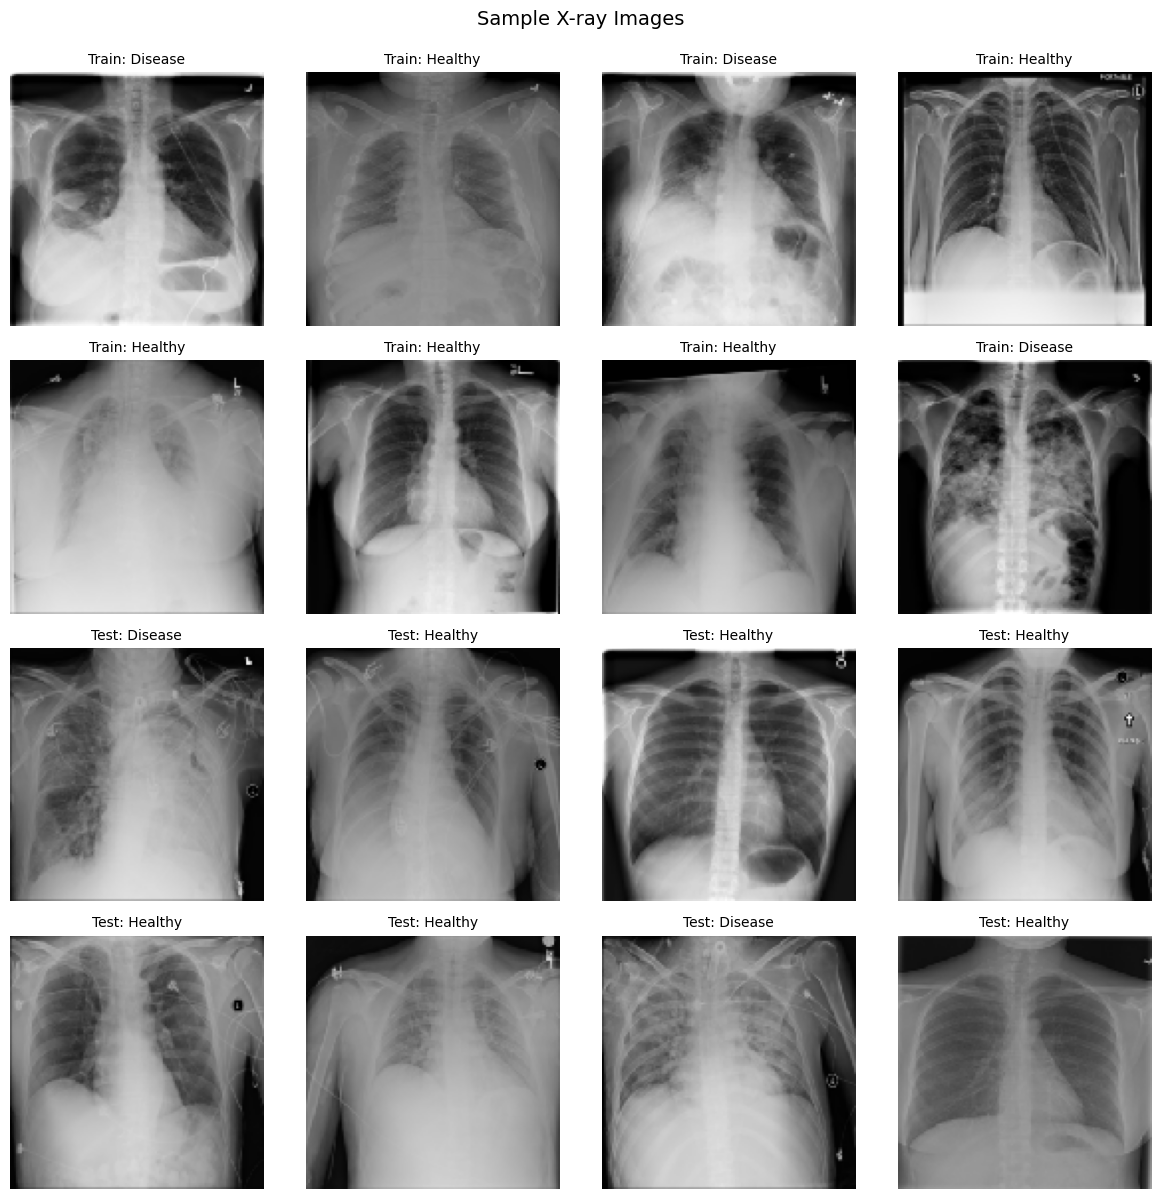

Sample visualization saved as 'xray_samples_unet.png'

Step 3: Creating data generators...
Found 8000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.

Step 4: Building U-Net model...


Model: "UNet_Classifier"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128, 128,  │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ dropout[0][0]     │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ dropout_1[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │    147,584 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ conv2d_5[0][0]  

 Total params: 7,944,385 (30.31 MB)

 Trainable params: 7,938,497 (30.28 MB)

 Non-trainable params: 5,888 (23.00 KB)

None
You must install pydot (`pip install pydot`) for `plot_model` to work.
U-Net architecture diagram saved as 'unet_architecture.png'

Step 5: Training U-Net model...
Epoch 1/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.5347 - auc: 0.5473 - loss: 0.7355
Epoch 1: val_auc improved from None to 0.61436, saving model to best_unet_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 237s 463ms/step - accuracy: 0.5512 - auc: 0.5615 - loss: 0.7064 - val_accuracy: 0.5830 - val_auc: 0.6144 - val_loss: 0.7086 - learning_rate: 0.0010
Epoch 2/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.5745 - auc: 0.5980 - loss: 0.6813
Epoch 2: val_auc did not improve from 0.61436
500/500 ━━━━━━━━━━━━━━━━━━━━ 240s 479ms/step - accuracy: 0.5816 - auc: 0.6076 - loss: 0.6784 - val_accuracy: 0.5025 - val_auc: 0.5959 - val_loss: 0.7066 - learning_rate: 0.0010
Epoch 3/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.5858 - auc: 0.6128 - loss: 0.6762
Epoch 3: val_auc did not improve from 0.61436
500/500 ━━━━━━━━━━━━━━━━━━━━ 239s 478ms/step - accuracy: 0.6004 - auc: 0.6299 - loss: 0.6710 - val_accuracy: 0.5645 - val_auc: 0.5941 - val_loss: 0.6825 - learning_rate: 0.0010
Epoch 4/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.6201 - auc: 0.6558 - loss: 0.6584
Epoch 4: val_auc improved from 0.61436 to 0.65551, saving model to best_un

500/500 ━━━━━━━━━━━━━━━━━━━━ 241s 483ms/step - accuracy: 0.6175 - auc: 0.6515 - loss: 0.6606 - val_accuracy: 0.5505 - val_auc: 0.6555 - val_loss: 0.6837 - learning_rate: 0.0010
Epoch 5/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.6227 - auc: 0.6565 - loss: 0.6580
Epoch 5: val_auc improved from 0.65551 to 0.66935, saving model to best_unet_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 240s 481ms/step - accuracy: 0.6223 - auc: 0.6573 - loss: 0.6584 - val_accuracy: 0.6285 - val_auc: 0.6693 - val_loss: 0.6501 - learning_rate: 0.0010
Epoch 6/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.6335 - auc: 0.6738 - loss: 0.6493
Epoch 6: val_auc improved from 0.66935 to 0.69653, saving model to best_unet_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 239s 477ms/step - accuracy: 0.6378 - auc: 0.6738 - loss: 0.6502 - val_accuracy: 0.6430 - val_auc: 0.6965 - val_loss: 0.6965 - learning_rate: 0.0010
Epoch 7/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.6400 - auc: 0.6817 - loss: 0.6443
Epoch 7: val_auc did not improve from 0.69653
500/500 ━━━━━━━━━━━━━━━━━━━━ 239s 477ms/step - accuracy: 0.6439 - auc: 0.6817 - loss: 0.6447 - val_accuracy: 0.6360 - val_auc: 0.6757 - val_loss: 0.6605 - learning_rate: 0.0010
Epoch 8/8
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.6450 - auc: 0.6781 - loss: 0.6481
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 8: val_auc did not improve from 0.69653
500/500 ━━━━━━━━━━━━━━━━━━━━ 237s 474ms/step - accuracy: 0.6461 - auc: 0.6810 - loss: 0.6462 - val_accuracy: 0.5910 - val_auc: 0.6748 - val_loss: 0.7033 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.

Step 6: Plotting training history...


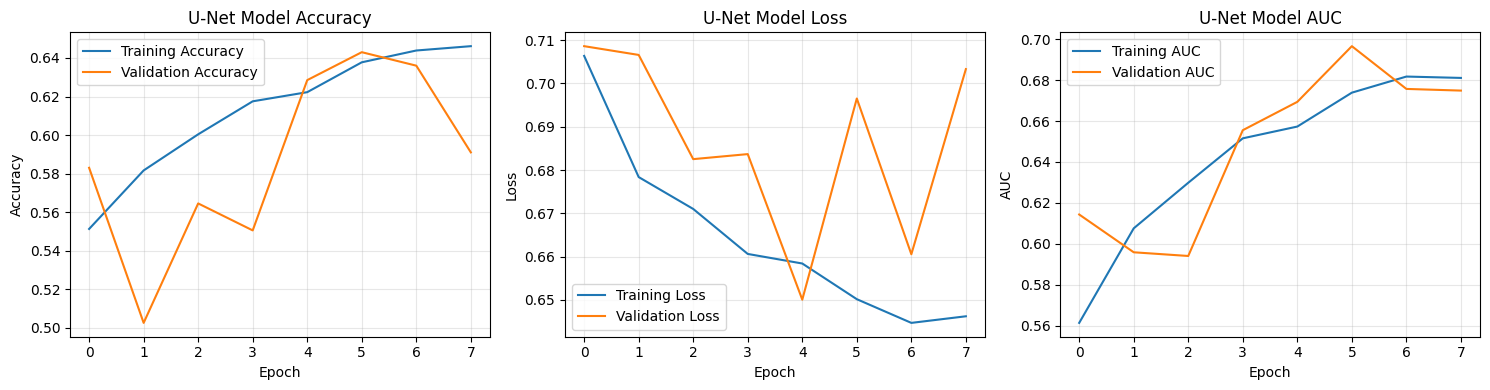

Training history saved as 'training_history_unet.png'

Step 7: Evaluating U-Net model...

U-NET MODEL EVALUATION SUMMARY
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step

Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

     Healthy       0.62      0.68      0.65      1000
     Disease       0.64      0.57      0.61      1000

    accuracy                           0.63      2000
   macro avg       0.63      0.63      0.63      2000
weighted avg       0.63      0.63      0.63      2000



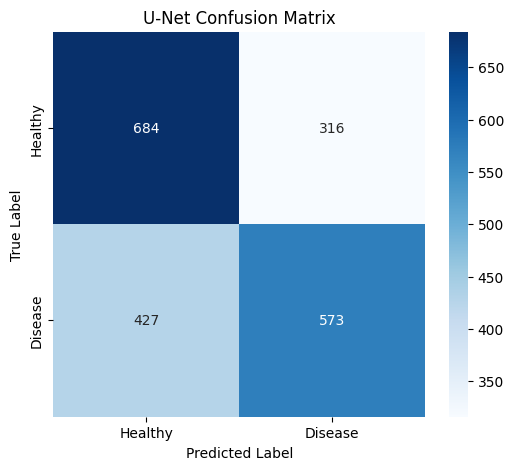


Confusion matrix saved as 'confusion_matrix_unet.png'


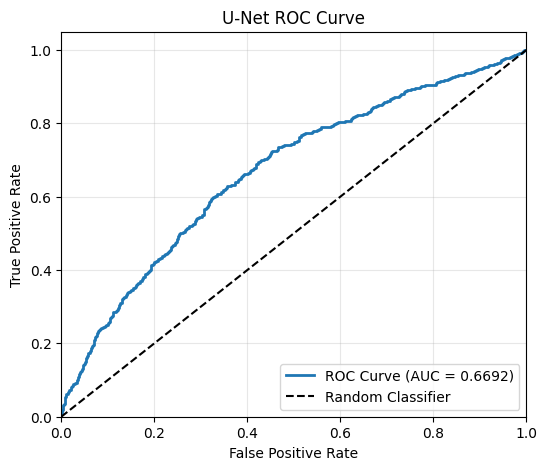

ROC curve saved as 'roc_curve_unet.png'

------------------------------------------------------------
Additional Performance Metrics:
------------------------------------------------------------
AUC-ROC Score: 0.6692
Sensitivity (Recall): 0.5730
Specificity: 0.6840
Positive Predictive Value (Precision): 0.6445
Negative Predictive Value: 0.6157

True Negatives: 684
False Positives: 316
False Negatives: 427
True Positives: 573

U-Net model saved as 'chest_xray_unet_model.h5'


In [6]:
#labels = pd.read_csv('your_labels.csv')
#image_db = '/path/to/your/images'

model, train_df, test_df = main(labels, image_db, sample_limit=5000)